# Analyzing Study Abroad Costs
## 1. Dataset Description
This dataset contains information on 907 international university programs across various countries and cities. It includes program details such as level, tuition, cost of living, visa, insurance fees, and exchange rates.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
palette_color = sns.color_palette('deep')[0]

## 2. Data Preprocessing

Exploring Data

In [19]:
df = pd.read_csv('International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


Summary statistics

In [20]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


Data info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


Check isnull data

In [22]:
df.isnull().sum()

Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

## 3. Research Questions

1. What are the top 5 most expensive countries for international students?

Show all colums in dataset

In [23]:
df.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

Create new column Total_Cost_USD

In [24]:
df['Total_Cost_USD'] = df['Tuition_USD'] + df['Rent_USD'] + df['Visa_Fee_USD'] + df['Insurance_USD']
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,59260
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,44285
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,41235
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,44500
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,2225


Find top 5 expesive countries

In [25]:
top5_expensive_countries = (
    df.groupby('Country', as_index=False)
    .agg(Avg_Total_Cost=('Total_Cost_USD', 'mean'))
    .sort_values(by='Avg_Total_Cost', ascending=False)
    .head(5)
)

top5_expensive_countries 

,Country,Avg_Total_Cost
66,USA,51261.282051
2,Australia,37072.093023
53,Singapore,36456.666667
65,UK,32845.752688
9,Canada,31542.236842


Create the barplot

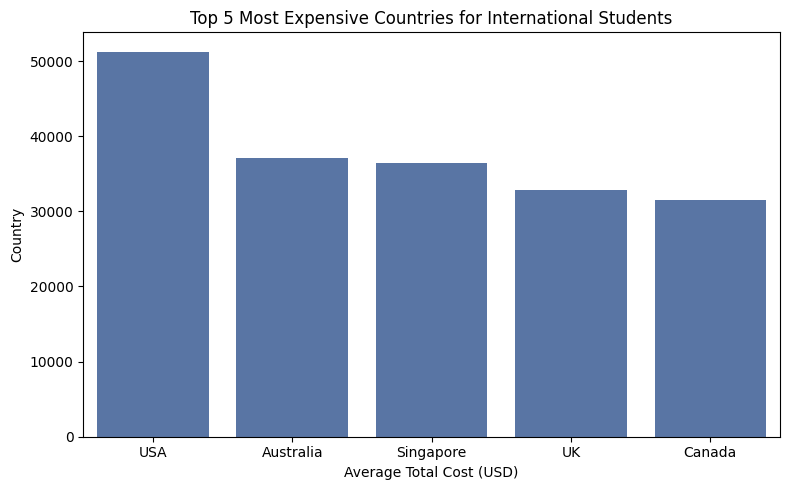

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Country', y='Avg_Total_Cost', data=top5_expensive_countries, color=palette_color)
plt.title('Top 5 Most Expensive Countries for International Students')
plt.xlabel('Average Total Cost (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

2. How does the average total cost compare by program level (Bachelor’s, Master’s, etc.)?

In [27]:
avg_cost_by_level = (
    df[['Level', 'Total_Cost_USD']]
    .groupby('Level', as_index=False)
    .agg(Avg_Total_Cost_By_Level=('Total_Cost_USD', 'mean'))
    .sort_values('Avg_Total_Cost_By_Level', ascending=False)
)

avg_cost_by_level


,Level,Avg_Total_Cost_By_Level
0,Bachelor,21771.639731
2,PhD,19012.465409
1,Master,16337.179601


Create the barplot

/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_7632/2205325467.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cost_by_level, x='Avg_Total_Cost_By_Level', y='Level', palette='Greens_d')


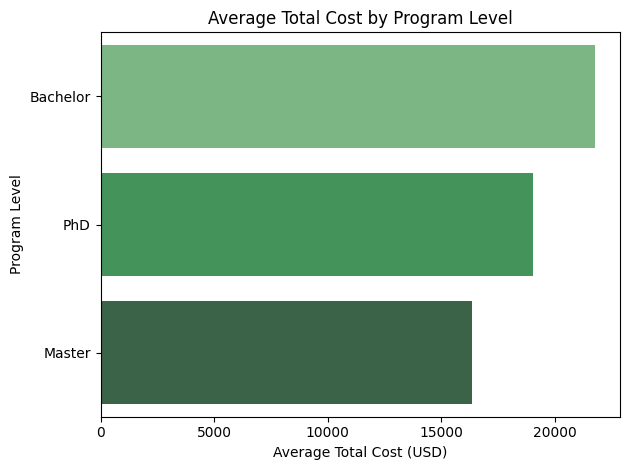

In [28]:
sns.barplot(data=avg_cost_by_level, x='Avg_Total_Cost_By_Level', y='Level', palette='Greens_d')
plt.title('Average Total Cost by Program Level')
plt.xlabel('Average Total Cost (USD)')
plt.ylabel('Program Level')
plt.tight_layout()
plt.show()



3. Which cities offer the most affordable study options?

In [29]:
avg_cost_by_city = (
    df[['City', 'Total_Cost_USD']]
    .groupby('City', as_index=False)
    .agg(Avg_Total_Cost_By_City=('Total_Cost_USD', 'mean'))
    .sort_values('Avg_Total_Cost_By_City', ascending=True)
    .head(5)
)

avg_cost_by_city

,City,Avg_Total_Cost_By_City
314,Mendoza,600.0
258,La Plata,610.0
413,Rosario,630.0
112,Cordoba,650.0
368,Paysandu,770.0


Create the barplot

/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_7632/2054954145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cost_by_city, x='City', y='Avg_Total_Cost_By_City', palette='Blues')


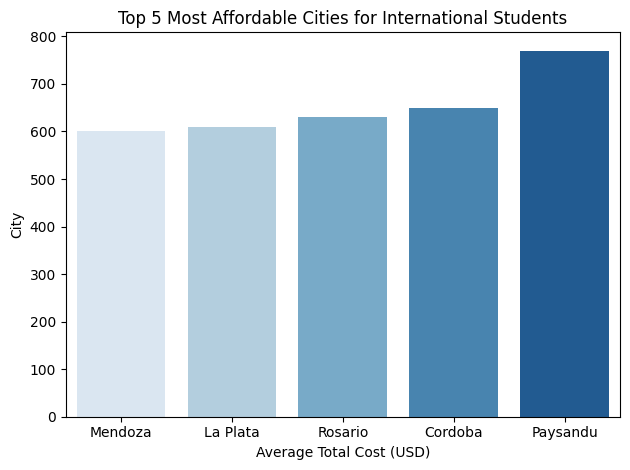

In [30]:
sns.barplot(data=avg_cost_by_city, x='City', y='Avg_Total_Cost_By_City', palette='Blues')
plt.title('Top 5 Most Affordable Cities for International Students')
plt.xlabel('Average Total Cost (USD)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

4. Which country provides the most university programs (majors)

In [31]:
program_count = (
    df.groupby('Country', as_index=False)
    .agg(Num_Programs=('Program', 'count')
    ).sort_values('Num_Programs', ascending=False)
    .head(5)
)
program_count

,Country,Num_Programs
65,UK,93
2,Australia,86
66,USA,78
9,Canada,76
22,Germany,33


Create the barplot

/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_7632/582196939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=program_count, x='Country', y='Num_Programs', palette='Purples_d')


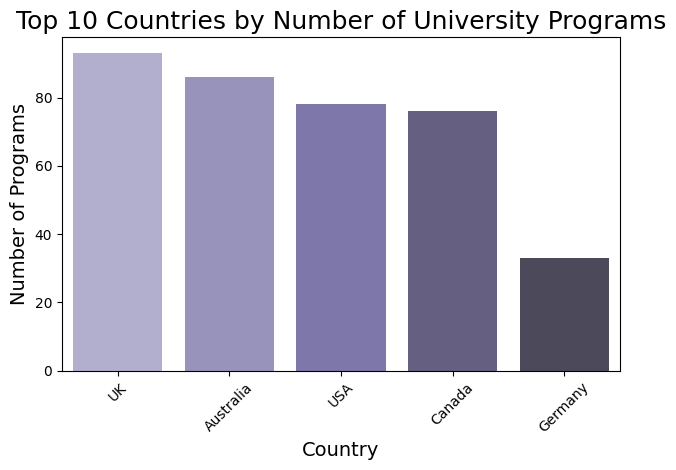

In [32]:
sns.barplot(data=program_count, x='Country', y='Num_Programs', palette='Purples_d')
plt.title('Top 10 Countries by Number of University Programs', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Programs', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Which country provides the best value in cost per study year?

In [33]:
df['Cost_Per_Year'] = df['Total_Cost_USD'] / df['Duration_Years']
avg_cost_per_year = (
    df.groupby('Country', as_index=False)
    .agg(Avg_Cost_Per_Year=('Cost_Per_Year', 'mean'))
    .sort_values(by='Avg_Cost_Per_Year', ascending=True)
    .head(5)
)

avg_cost_per_year

,Country,Avg_Cost_Per_Year
1,Argentina,215.416667
24,Greece,553.823529
0,Algeria,599.666667
7,Brazil,644.375000
58,Sweden,720.500000


Create the barplot

/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_7632/2991855583.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cost_per_year, x='Country', y='Avg_Cost_Per_Year', palette='Greens_d')


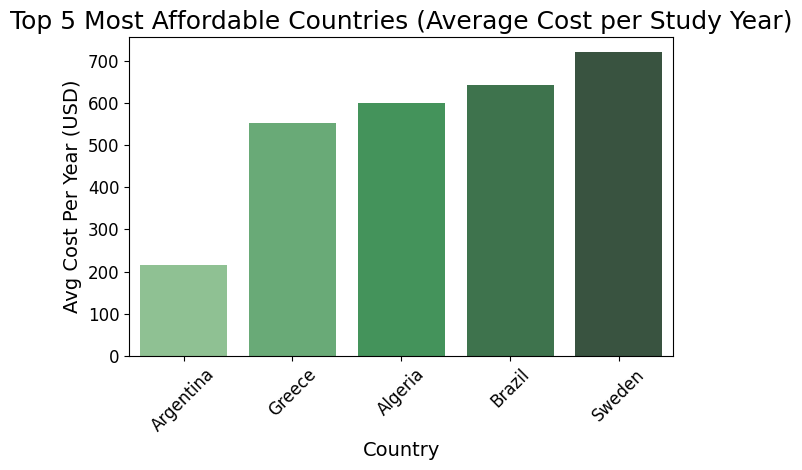

In [34]:
sns.barplot(data=avg_cost_per_year, x='Country', y='Avg_Cost_Per_Year', palette='Greens_d')

plt.title('Top 5 Most Affordable Countries (Average Cost per Study Year)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Avg Cost Per Year (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()